In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Analysis imports
from pandas.plotting import lag_plot
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat

# Modelling imports
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from prophet import Prophet 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, RNN
from keras.layers import Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('/content/drive/MyDrive/bangladesh-food-prices-2-1.xlsx')
df.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,2006-12-15,Wheat flour - Retail,KG,cereals and tubers,23.0,BDT,Bangladesh,Barisal,575,Barisal Division,112,58,15,5,1,112_58_15_5,NaN
1,2007-01-15,Wheat flour - Retail,KG,cereals and tubers,25.5,BDT,Bangladesh,Barisal,575,Barisal Division,112,58,15,5,1,112_58_15_5,NaN
2,2007-02-15,Wheat flour - Retail,KG,cereals and tubers,25.5,BDT,Bangladesh,Barisal,575,Barisal Division,112,58,15,5,1,112_58_15_5,NaN
3,2007-03-15,Wheat flour - Retail,KG,cereals and tubers,26.0,BDT,Bangladesh,Barisal,575,Barisal Division,112,58,15,5,1,112_58_15_5,NaN
4,2007-04-15,Wheat flour - Retail,KG,cereals and tubers,26.0,BDT,Bangladesh,Barisal,575,Barisal Division,112,58,15,5,1,112_58_15_5,NaN


In [4]:
df=df.sort_values(by=['date'], ascending=True)

In [5]:
df

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
1241,2004-01-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
1242,2004-02-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
1243,2004-03-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
1244,2004-04-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
1245,2004-05-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,2018-08-15,Rice (coarse) - Retail,KG,cereals and tubers,38.873,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
948,2018-08-15,Lentils (masur) - Retail,KG,pulses and nuts,61.167,BDT,Bangladesh,Chittagong,576,Chittagong Division,114,61,15,5,5,114_61_15_5,NaN
1240,2018-08-15,Wheat flour - Retail,KG,cereals and tubers,31.979,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,58,15,5,1,116_58_15_5,NaN
2012,2018-08-15,Rice (coarse) - Retail,KG,cereals and tubers,37.102,BDT,Bangladesh,Khulna,578,Khulna Division,118,60,15,5,1,118_60_15_5,NaN


In [6]:
df=df.query('`cmname` == "Rice (coarse) - Retail"')

In [7]:
df

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
1241,2004-01-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
1242,2004-02-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
1243,2004-03-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
1244,2004-04-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
1245,2004-05-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2018-08-15,Rice (coarse) - Retail,KG,cereals and tubers,36.173,BDT,Bangladesh,Chittagong,576,Chittagong Division,114,60,15,5,1,114_60_15_5,NaN
3138,2018-08-15,Rice (coarse) - Retail,KG,cereals and tubers,35.250,BDT,Bangladesh,Sylhet,580,Sylhet Division,122,60,15,5,1,122_60_15_5,NaN
271,2018-08-15,Rice (coarse) - Retail,KG,cereals and tubers,39.930,BDT,Bangladesh,Barisal,575,Barisal Division,112,60,15,5,1,112_60_15_5,NaN
1413,2018-08-15,Rice (coarse) - Retail,KG,cereals and tubers,38.873,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN


In [8]:

df.index  = df['date']
df

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
date,,,,,,,,,,,,,,,,,
2004-01-15,2004-01-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
2004-02-15,2004-02-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
2004-03-15,2004-03-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
2004-04-15,2004-04-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
2004-05-15,2004-05-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-15,2018-08-15,Rice (coarse) - Retail,KG,cereals and tubers,36.173,BDT,Bangladesh,Chittagong,576,Chittagong Division,114,60,15,5,1,114_60_15_5,NaN
2018-08-15,2018-08-15,Rice (coarse) - Retail,KG,cereals and tubers,35.250,BDT,Bangladesh,Sylhet,580,Sylhet Division,122,60,15,5,1,122_60_15_5,NaN
2018-08-15,2018-08-15,Rice (coarse) - Retail,KG,cereals and tubers,39.930,BDT,Bangladesh,Barisal,575,Barisal Division,112,60,15,5,1,112_60_15_5,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 873 entries, 2004-01-15 to 2018-08-15
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      873 non-null    datetime64[ns]
 1   cmname    873 non-null    object        
 2   unit      873 non-null    object        
 3   category  873 non-null    object        
 4   price     873 non-null    float64       
 5   currency  873 non-null    object        
 6   country   873 non-null    object        
 7   admname   873 non-null    object        
 8   adm1id    873 non-null    int64         
 9   mktname   873 non-null    object        
 10  mktid     873 non-null    int64         
 11  cmid      873 non-null    int64         
 12  ptid      873 non-null    int64         
 13  umid      873 non-null    int64         
 14  catid     873 non-null    int64         
 15  sn        873 non-null    object        
 16  default   0 non-null      float64       
dt

In [10]:
values = DataFrame(df['price'].values)
dataframe = concat([values.shift(1),values.shift(5),values.shift(10),values.shift(30), values], axis=1)
dataframe.columns = ['t', 't+1', 't+5', 't+10', 't+30']
result = dataframe.corr()
print(result)

             t       t+1       t+5      t+10      t+30
t     1.000000  0.803039  0.744910  0.648448  0.835928
t+1   0.803039  1.000000  0.818100  0.664673  0.820322
t+5   0.744910  0.818100  1.000000  0.681853  0.753457
t+10  0.648448  0.664673  0.681853  1.000000  0.652600
t+30  0.835928  0.820322  0.753457  0.652600  1.000000


Split train and test data

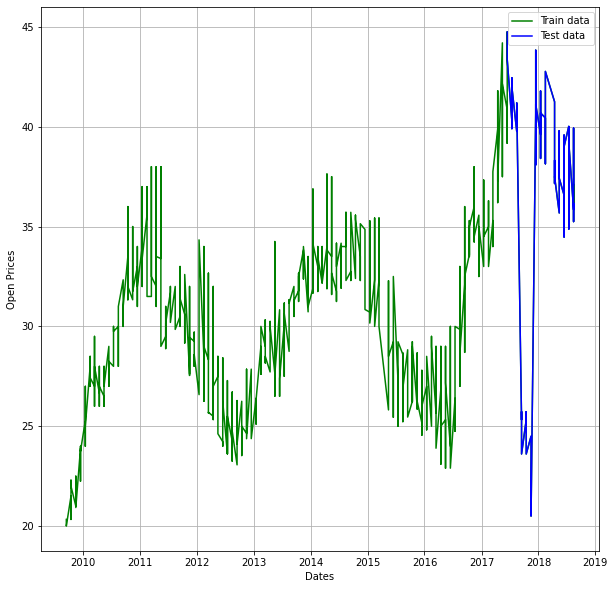

In [11]:
train_data, test_data = df[0:-60], df[-60:]
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(df['price'].tail(600), 'green', label='Train data')
plt.plot(test_data['price'], 'blue', label='Test data')
plt.legend()

Show the closing_price column data

In [12]:
df['price']

date
2004-01-15    14.000
2004-02-15    14.000
2004-03-15    14.000
2004-04-15    14.000
2004-05-15    14.000
               ...  
2018-08-15    36.173
2018-08-15    35.250
2018-08-15    39.930
2018-08-15    38.873
2018-08-15    37.102
Name: price, Length: 873, dtype: float64

We take 60 days data to test our models

In [13]:
test_data.price.tail(30) 

date
2018-02-15    40.235
2018-02-15    42.770
2018-04-15    41.250
2018-04-15    37.880
2018-04-15    37.160
2018-04-15    38.320
2018-04-15    37.500
2018-05-15    35.680
2018-05-15    39.800
2018-05-15    39.580
2018-05-15    38.075
2018-05-15    37.418
2018-06-15    36.574
2018-06-15    37.150
2018-06-15    38.535
2018-06-15    39.580
2018-06-15    34.480
2018-06-15    39.000
2018-07-15    40.020
2018-07-15    36.704
2018-07-15    37.563
2018-07-15    34.875
2018-07-15    39.993
2018-07-15    39.233
2018-08-15    35.845
2018-08-15    36.173
2018-08-15    35.250
2018-08-15    39.930
2018-08-15    38.873
2018-08-15    37.102
Name: price, dtype: float64

In [14]:
train_data.price.tail(30) 

date
2017-01-15    33.0000
2017-01-15    35.1400
2017-01-15    37.3300
2017-01-15    33.5000
2017-01-15    33.3600
2017-01-15    34.5000
2017-02-15    35.0000
2017-02-15    36.2900
2017-02-15    34.0000
2017-02-15    35.5000
2017-02-15    36.2500
2017-02-15    33.0000
2017-03-15    35.3000
2017-03-15    34.0000
2017-03-15    35.4000
2017-03-15    37.0000
2017-03-15    37.0000
2017-03-15    37.7500
2017-04-15    39.8750
2017-04-15    37.0000
2017-04-15    41.8000
2017-04-15    36.2000
2017-04-15    37.2727
2017-05-15    44.2000
2017-05-15    37.5000
2017-05-15    38.8000
2017-05-15    39.4167
2017-05-15    42.1429
2017-06-15    40.8500
2017-06-15    39.1678
Name: price, dtype: float64

MSE: 108.79722479574212
MAE: 9.905508986254292
RMSE: 10.430590817194496


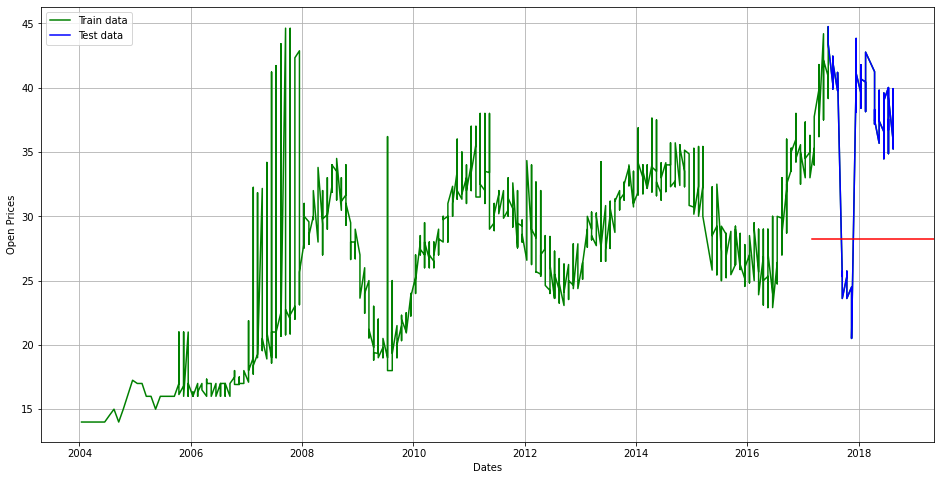

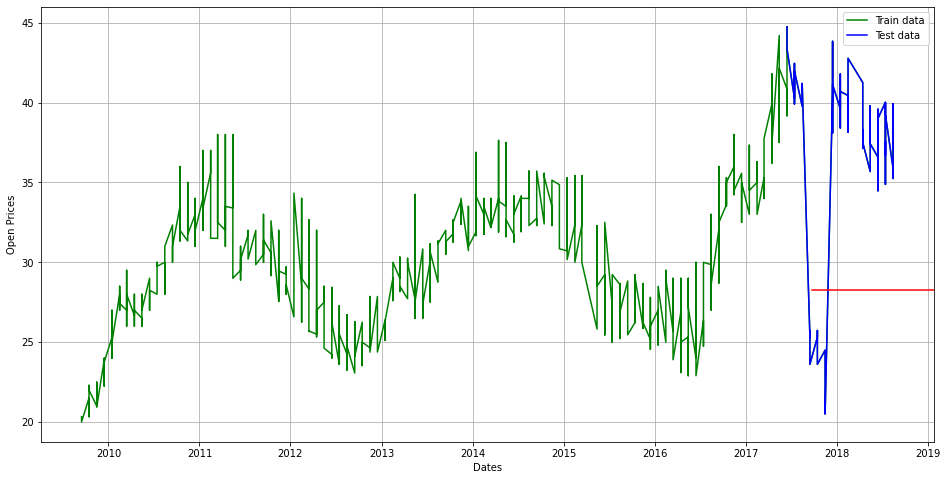

In [15]:
mean_value = df['price'].mean() # calculation of mean price

plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(df['price'], 'green', label='Train data')
plt.plot(test_data['price'], 'blue', label='Test data')
plt.axhline(y=mean_value, xmin=0.864, xmax=1, color='red')
plt.legend()

plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(df['price'].tail(600), 'green', label='Train data')
plt.plot(test_data['price'], 'blue', label='Test data')
plt.axhline(y=mean_value, xmin=0.864, xmax=1, color='red')
plt.legend()

print('MSE: '+str(mean_squared_error(test_data['price'], np.full(len(test_data), mean_value))))
print('MAE: '+str(mean_absolute_error(test_data['price'], np.full(len(test_data), mean_value))))
print('RMSE: '+str(sqrt(mean_squared_error(test_data['price'], np.full(len(test_data), mean_value)))))

Train data for ARIMA model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


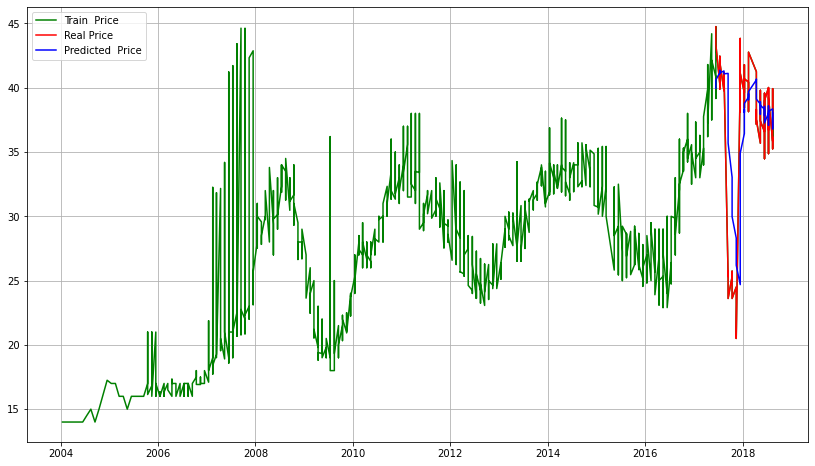

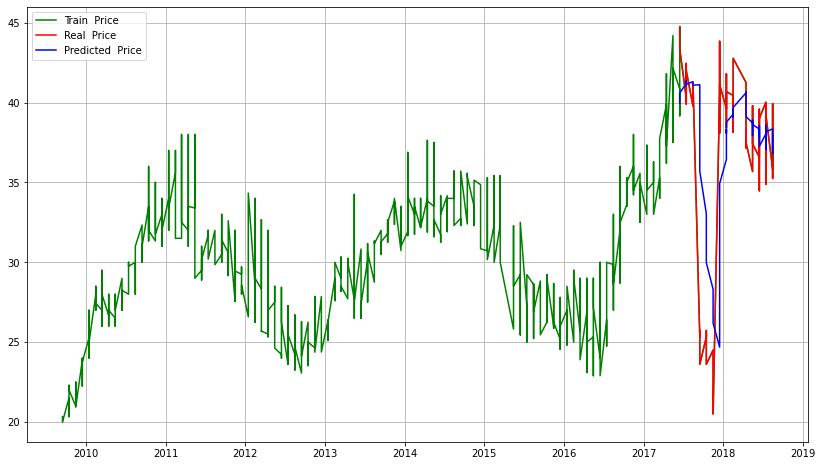

MSE: 25.484632631904095
MAE: 3.4068840155508746
RMSE: 5.048230643691322


In [16]:
train_arima = train_data['price']
test_arima = test_data['price']

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    
plt.figure(figsize=(14,8))
plt.plot(df.index, df['price'], color='green', label = 'Train  Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted  Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(df.index[-600:], df['price'].tail(600), color='green', label = 'Train  Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real  Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted  Price')
plt.legend()
plt.grid(True)
plt.show()

print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))

In [17]:
test_data.reset_index(drop=True, inplace=True)

Predicted result for ARIMA model

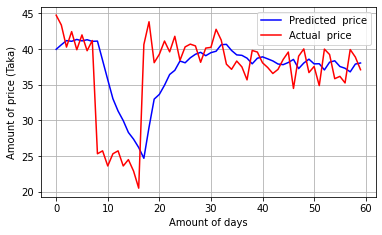

In [18]:
#y_test = df.iloc[int(7200): ,0:1].values
plt.figure(figsize=(6,3.5))
#plt.suptitle('Sine and cosine waves', fontsize=13)
plt.plot(predictions, color='blue', label='Predicted  price')
plt.plot(test_data['price'], color ='red', label='Actual  price')
plt.xlabel('Amount of days', fontsize=10)
plt.ylabel('Amount of price (Taka)', fontsize=10)
#plt.xticks(rotation=0,fontsize=12)
#plt.yticks(rotation=0,fontsize=12)
plt.grid(True)
#plt.savefig('ARIMA_Close_Price.jpeg')
plt.legend()
plt.show()

In [19]:
df.index  = df['date']
df

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
date,,,,,,,,,,,,,,,,,
2004-01-15,2004-01-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
2004-02-15,2004-02-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
2004-03-15,2004-03-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
2004-04-15,2004-04-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
2004-05-15,2004-05-15,Rice (coarse) - Retail,KG,cereals and tubers,14.000,BDT,Bangladesh,Dhaka,577,Dhaka Division,116,60,15,5,1,116_60_15_5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-15,2018-08-15,Rice (coarse) - Retail,KG,cereals and tubers,36.173,BDT,Bangladesh,Chittagong,576,Chittagong Division,114,60,15,5,1,114_60_15_5,NaN
2018-08-15,2018-08-15,Rice (coarse) - Retail,KG,cereals and tubers,35.250,BDT,Bangladesh,Sylhet,580,Sylhet Division,122,60,15,5,1,122_60_15_5,NaN
2018-08-15,2018-08-15,Rice (coarse) - Retail,KG,cereals and tubers,39.930,BDT,Bangladesh,Barisal,575,Barisal Division,112,60,15,5,1,112_60_15_5,NaN


Pre-process data for Prophet model

In [20]:
ph_df_train = train_data.drop(['cmname', 'unit', 'category','currency',
                               'country','admname','adm1id','mktname','mktid',
                               'cmid','ptid','umid','catid','sn','default'], axis=1)
ph_df_train['date'] = ph_df_train.index
ph_df_train.rename(columns={'price': 'y', 'date': 'ds'}, inplace=True)

prop = Prophet(changepoint_prior_scale=0.1)
prop.fit(ph_df_train)
# Create Future dates
future_prices = prop.make_future_dataframe(periods=73)

# Predict Prices
forecast = prop.predict(future_prices)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgpwt_w5t/g9p1z10m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgpwt_w5t/rudzogx6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38209', 'data', 'file=/tmp/tmpgpwt_w5t/g9p1z10m.json', 'init=/tmp/tmpgpwt_w5t/rudzogx6.json', 'output', 'file=/tmp/tmpenr0vkv1/prophet_model-20220905092418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:24:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:24:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
forecast['yhat']

0      12.348317
1      12.083353
2      12.331270
3      12.710830
4      12.713411
         ...    
229    33.922033
230    34.580259
231    35.266933
232    35.961660
233    36.643614
Name: yhat, Length: 234, dtype: float64

In [22]:
test_data.index  = test_data['date']

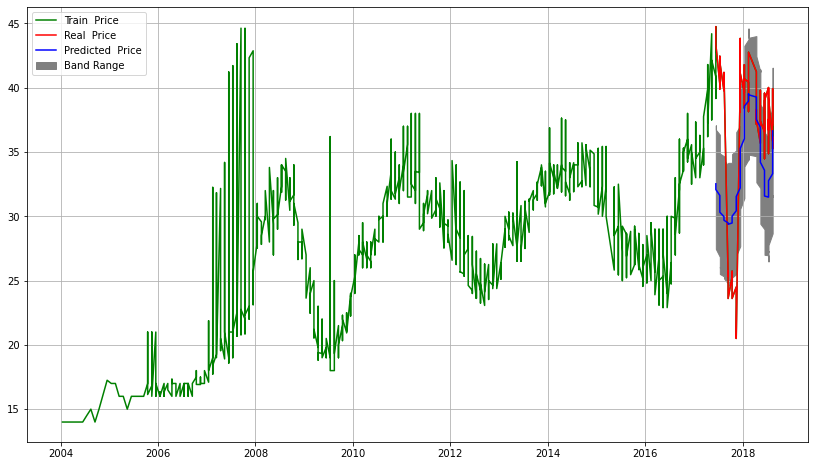

In [23]:
plt.figure(figsize=(14,8))
plt.plot(df.index, df['price'], color='green', label = 'Train  Price')
plt.plot(test_data.index, test_data['price'], color = 'red', label = 'Real  Price')
plt.plot(test_data.index, forecast['yhat'][-60:], color = 'blue', label = 'Predicted  Price')
plt.fill_between(test_data.index, forecast['yhat_lower'][-60:], forecast['yhat_upper'][-60:], color='grey', label="Band Range")
plt.legend()
plt.grid(True)
plt.show()

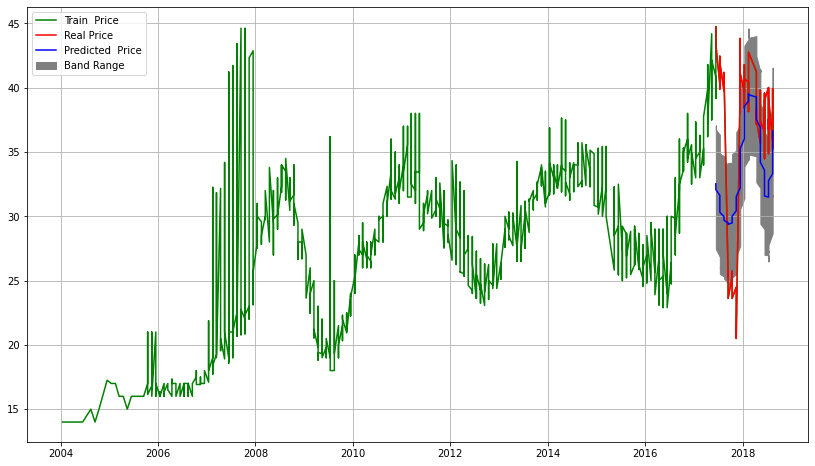

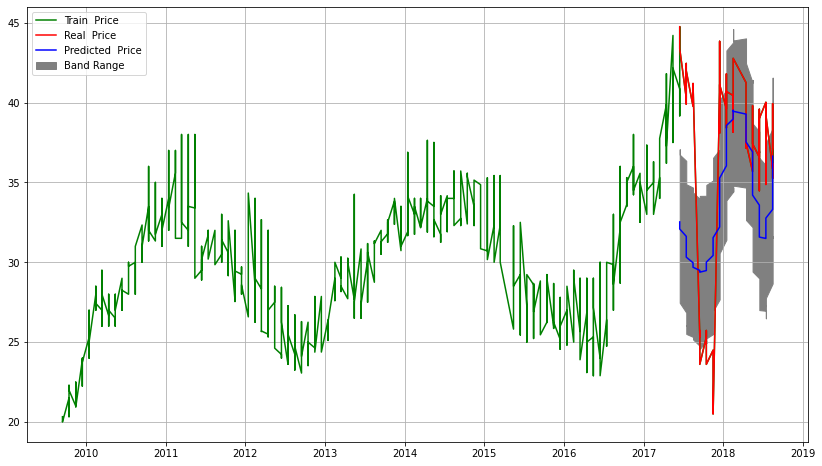

MSE: 35.705220045666735
MAE: 4.920894941075105
RMSE: 5.9753845102777055


In [24]:
plt.figure(figsize=(14,8))
plt.plot(df.index, df['price'], color='green', label = 'Train  Price')
plt.plot(test_data.index, test_data['price'], color = 'red', label = 'Real Price')
plt.plot(test_data.index, forecast['yhat'][-60:], color = 'blue', label = 'Predicted  Price')
plt.fill_between(test_data.index, forecast['yhat_lower'][-60:], forecast['yhat_upper'][-60:], color='grey', label="Band Range")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(df.index[-600:], df['price'].tail(600), color='green', label = 'Train  Price')
plt.plot(test_data.index, test_data['price'], color = 'red', label = 'Real  Price')
plt.plot(test_data.index, forecast['yhat'][-60:], color = 'blue', label = 'Predicted  Price')
plt.fill_between(test_data.index, forecast['yhat_lower'][-60:], forecast['yhat_upper'][-60:], color='grey', label="Band Range")
plt.legend()
plt.grid(True)
plt.show()
print('MSE: '+str(mean_squared_error(test_data['price'], forecast['yhat'][-60:])))
print('MAE: '+str(mean_absolute_error(test_data['price'], forecast['yhat'][-60:])))
print('RMSE: '+str(sqrt(mean_squared_error(test_data['price'], forecast['yhat'][-60:]))))

In [25]:
train = train_data.iloc[:, 4:5].values # selecting open prices
# Feature Scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train) 
# Train dataset
timesteps = 7
X_train = []
y_train = []
for i in range(timesteps, train.shape[0]):
    X_train.append(train_scaled[i-timesteps:i, 0]) # we take 30 previous prices
    y_train.append(train_scaled[i, 0]) # and 60-th price as y value
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
from numpy.random import seed
seed(2019)

LSTM model training

In [26]:
model = Sequential()

# Adding the first LSTM layer 
# Here return_sequences=True means whether to return the last output in the output sequence, or the full sequence.
# it basically tells us that there is another(or more) LSTM layer ahead in the network.
model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# Dropout regularisation for tackling overfitting
#model.add(Dropout(0.2))

model.add(LSTM(units = 50))
#model.add(Dropout(0.25))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
# RMSprop is a recommended optimizer as per keras documentation
# check out https://keras.io/optimizers/ for more details
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
51/51 [==============================] - 4s 5ms/step - loss: 0.0342
Epoch 2/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0089
Epoch 3/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 4/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0089
Epoch 5/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0087
Epoch 6/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0085
Epoch 7/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0085
Epoch 8/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0087
Epoch 9/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0088
Epoch 10/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0092
Epoch 11/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 12/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0087
Epoch 13/100
51/51 [=================

In [27]:
# this will be used later while comparing and visualization
real_stock_price = test_data.iloc[:,4:5].values # taking open price
# combine original train and test data vertically
# as previous Open Prices are not present in test dataset
# e.g. for predicting Open price for first date in test data, we will need stock open prices on timesteps previous dates  
combine = pd.concat((train_data['price'], test_data['price']), axis = 0)
# our test inputs also contains stock open Prices of last timesteps dates (as described above)
test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
# same steps as we followed while processing training data
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
# inverse_transform because prediction is done on scaled inputs
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

Predicted result for LSTM model

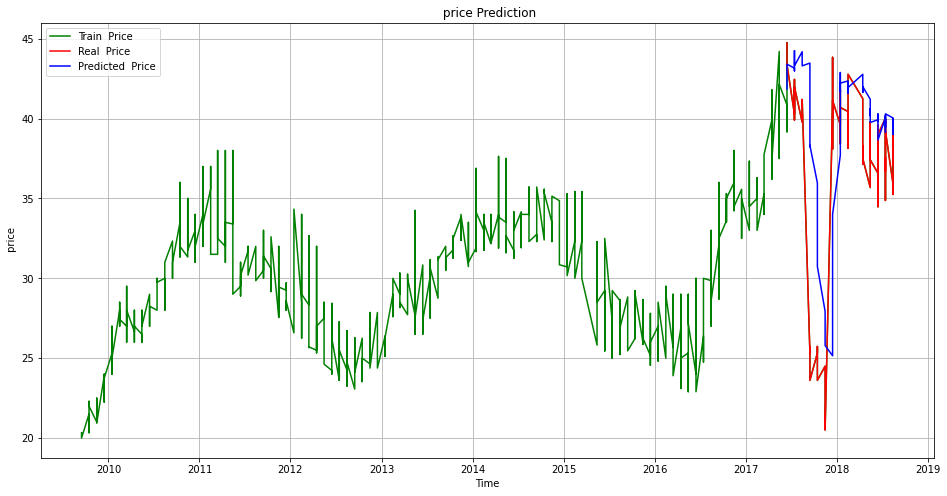

MSE: 34.668304768908506
MAE: 4.19347648223877
RMSE: 5.887979684824711


In [28]:
plt.figure(figsize=(16,8))
plt.plot(df.index[-600:], df['price'].tail(600), color='green', label = 'Train  Price')
plt.plot(test_data.index, real_stock_price, color = 'red', label = 'Real  Price')
plt.plot(test_data.index, predicted_stock_price, color = 'blue', label = 'Predicted  Price')
plt.title(' price Prediction')
plt.xlabel('Time')
plt.ylabel(' price')
plt.legend()
plt.grid(True)
#plt.savefig('lstm_30.pdf')
plt.show()

mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse))
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse))

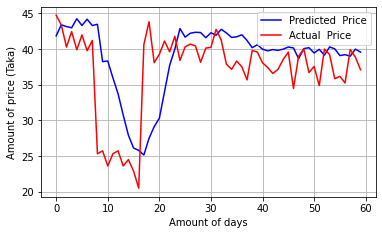

In [29]:
test_data.reset_index(drop=True, inplace=True)
#y_test = df.iloc[int(7200): ,0:1].values
plt.figure(figsize=(6,3.5))
#plt.suptitle('Sine and cosine waves', fontsize=13)
plt.plot(predicted_stock_price, color='blue', label='Predicted  Price')
plt.plot(test_data['price'], color ='red', label='Actual  Price')
plt.xlabel('Amount of days', fontsize=10)
plt.ylabel('Amount of price (Taka)', fontsize=10)
#plt.xticks(rotation=0,fontsize=12)
#plt.yticks(rotation=0,fontsize=12)
plt.grid(True)
#plt.savefig('LSTM_opening_price.jpeg')
plt.legend()
plt.show()

Training data by GRU model

In [30]:
model = Sequential()

# Adding the first GRU layer 
# Here return_sequences=True means whether to return the last output in the output sequence, or the full sequence.
# it basically tells us that there is another(or more) GRU layer ahead in the network.
model.add(GRU(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# Dropout regularisation for tackling overfitting
model.add(Dropout(0.2))

model.add(GRU(units = 50))
model.add(Dropout(0.25))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
# RMSprop is a recommended optimizer as per keras documentation
# check out https://keras.io/optimizers/ for more details
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 200, batch_size = 16)

Epoch 1/200
51/51 [==============================] - 3s 5ms/step - loss: 0.0327
Epoch 2/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0115
Epoch 3/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0119
Epoch 4/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0116
Epoch 5/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0109
Epoch 6/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0114
Epoch 7/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0111
Epoch 8/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0113
Epoch 9/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0127
Epoch 10/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0120
Epoch 11/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0106
Epoch 12/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0114
Epoch 13/200
51/51 [=================

In [31]:
# this will be used later while comparing and visualization
real_stock_price_GRU = test_data.iloc[:,4:5].values # taking open price
# combine original train and test data vertically
# as previous Open Prices are not present in test dataset
# e.g. for predicting Open price for first date in test data, we will need stock open prices on timesteps previous dates  
combine = pd.concat((train_data['price'], test_data['price']), axis = 0)
# our test inputs also contains stock open Prices of last timesteps dates (as described above)
test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
# same steps as we followed while processing training data
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price_GRU = model.predict(X_test)
# inverse_transform because prediction is done on scaled inputs
predicted_stock_price_GRU = scaler.inverse_transform(predicted_stock_price_GRU)

In [32]:
test_data.index  = test_data['date']

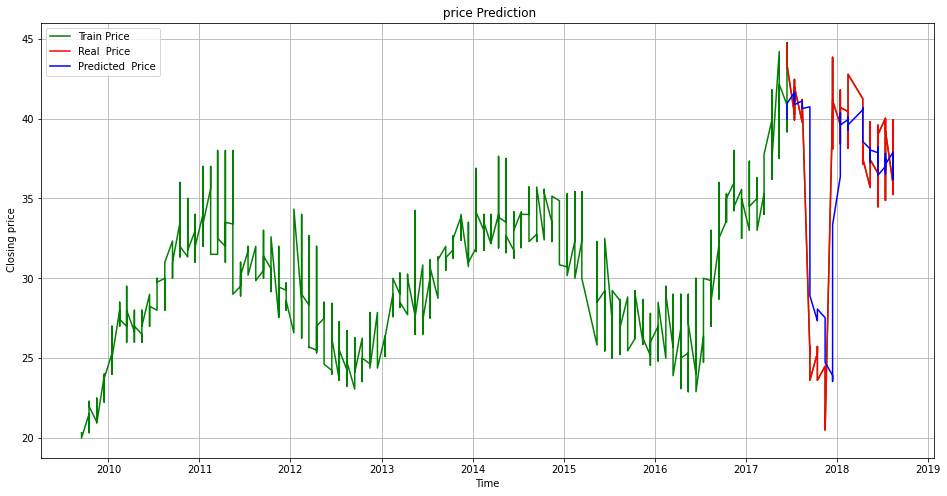

MSE: 25.193285544097236
MAE: 3.161188042348226
RMSE: 5.019291338834321


In [33]:
plt.figure(figsize=(16,8))
plt.plot(df.index[-600:], df['price'].tail(600), color='green', label = 'Train Price')
plt.plot(test_data.index, real_stock_price_GRU, color = 'red', label = 'Real  Price')
plt.plot(test_data.index, predicted_stock_price_GRU, color = 'blue', label = 'Predicted  Price')
plt.title(' price Prediction')
plt.xlabel('Time')
plt.ylabel(' Closing price')
plt.legend()
plt.grid(True)
plt.savefig('lstm_30.pdf')
plt.show()


mse = mean_squared_error(real_stock_price_GRU, predicted_stock_price_GRU)
print('MSE: '+str(mse))
mae = mean_absolute_error(real_stock_price_GRU, predicted_stock_price_GRU)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(real_stock_price_GRU, predicted_stock_price_GRU))
print('RMSE: '+str(rmse))

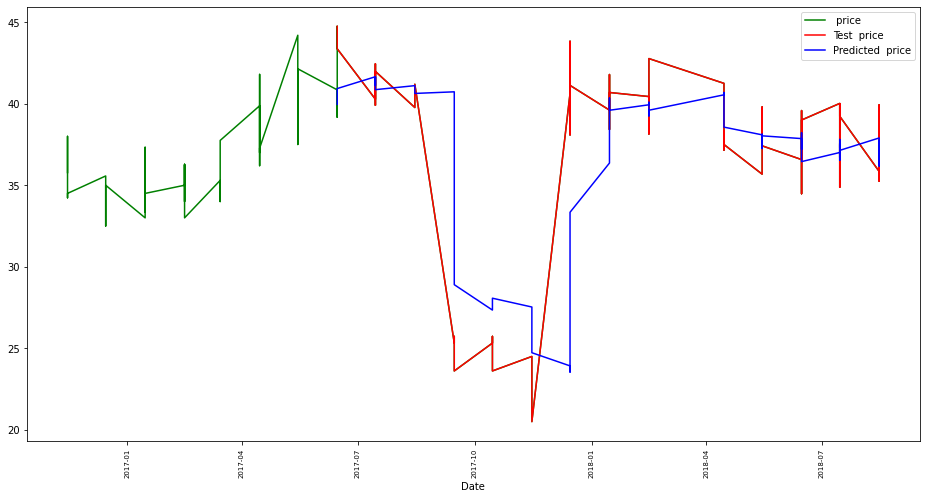

In [34]:
plt.figure(figsize=(16,8))
#print('Lag: %s' % model_fit.k_ar)
plt.plot(df.index[-100:], df['price'].tail(100), color='green', label=' price')
plt.plot(test_data.index, test_data['price'], color='red', label='Test  price')
plt.plot(test_data.index, predicted_stock_price_GRU, color='blue', label='Predicted  price')
plt.xlabel('Date', fontsize=10)
plt.xticks(rotation=90,fontsize=7)
#plt.grid(True)
plt.legend()